## Teoría

### Ejercicio 2

1. **Clasificación de rasgos:**

   * **Edad:** **Rasgo continuo**. La edad toma un valor dentro de un rango de números y se puede dividir en unidades más pequeñas. Este tipo de rasgo puede tener decimales si se mide de forma precisa, como en el caso de la edad en meses.

   * **Profesión:** **Rasgo discreto**. La profesión es un valor categórico que no puede dividirse de manera continua. Cada persona pertenece a una categoría (por ejemplo, ingeniero, médico, arquitecto) sin posibilidad de tomar valores intermedios.

   * **Redes de amistad:** **Rasgo relacional**. Las redes de amistad son más complejas, ya que involucran relaciones entre individuos, que se pueden modelar como relaciones binarias (amigo/no amigo) o como estructuras más complejas, pero en sí no son ni continuas ni discretas de manera sencilla. Se puede representar mediante un grafo de relaciones.

   * **Estado de vacunación:** **Rasgo discreto**. El estado de vacunación es un valor categórico, ya sea "vacunado" o "no vacunado", lo cual lo clasifica como un rasgo discreto.

2. **Cálculo del tamaño del espacio de parámetros:**

   * Para un escenario de 10,000 agentes con los siguientes rasgos:

     * **3 rasgos continuos (p. ej., tasa de movilidad):**
       Si cada rasgo continuo puede tomar un valor en un intervalo definido, el espacio de parámetros para cada uno de estos rasgos podría representarse por una gama infinita de valores posibles, pero con una precisión determinada. El espacio de parámetros para estos tres rasgos será el producto de los valores posibles para cada rasgo.

     * **2 rasgos discretos (p. ej., ocupación):**
       Estos rasgos solo pueden tomar valores fijos, por ejemplo, “empleado” o “desempleado”. El espacio de parámetros de estos rasgos es mucho más reducido comparado con los rasgos continuos. Cada uno tiene un número limitado de valores posibles.

   **Cálculo del tamaño del espacio de parámetros:**

   * Para cada agente, el espacio de parámetros sería una combinación de los rasgos continuos y discretos.
   * Si asumimos que cada rasgo tiene un número limitado de valores posibles (para los rasgos discretos) y un rango para los continuos, podemos multiplicar los posibles valores para cada agente.

   **Afecto al tiempo de ejecución de la simulación:**

   * A medida que aumentan los rasgos continuos, el número de posibles combinaciones por agente crece exponencialmente, lo que hace que el cálculo y la simulación tomen más tiempo. Los rasgos discretos aumentan la complejidad, pero en menor medida que los continuos, ya que solo hay un número finito de opciones para cada uno.

## Parte Práctica 

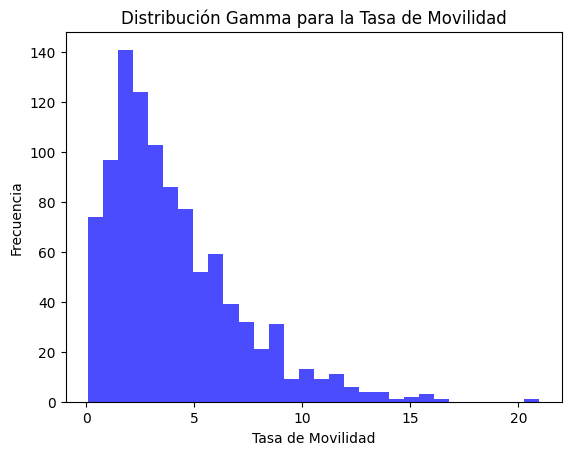

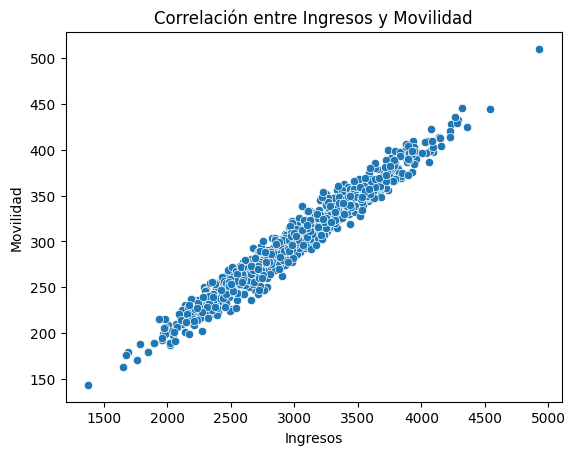

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Definición de la clase PerfilPoblacional
class PerfilPoblacional:
    def __init__(self, ocupacion, movilidad, edad, ingresos, identificacion_hogar):
        """
        Atributos:
        - ocupacion: Rasgo discreto (p. ej., 'salud', 'educacion', etc.)
        - movilidad: Rasgo continuo (p. ej., tasa de movilidad: 0 a 100)
        - edad: Rasgo continuo (p. ej., edad en años)
        - ingresos: Rasgo continuo (p. ej., ingresos mensuales)
        - identificacion_hogar: Rasgo relacional (p. ej., código de hogar o identificación única)
        """
        self.ocupacion = ocupacion
        self.movilidad = movilidad
        self.edad = edad
        self.ingresos = ingresos
        self.identificacion_hogar = identificacion_hogar

    def __str__(self):
        return f"Ocupación: {self.ocupacion}, Movilidad: {self.movilidad}, Edad: {self.edad}, Ingresos: {self.ingresos}, Hogar: {self.identificacion_hogar}"

# 2. Proponer métodos de muestreo para distribuciones realistas
# Definir parámetros de la distribución Gamma
alpha = 2  # forma
beta = 2   # escala
size = 1000  # tamaño de la muestra

# Generar datos usando la distribución Gamma
movilidad = np.random.gamma(alpha, beta, size)

# Graficar la distribución generada
plt.hist(movilidad, bins=30, alpha=0.7, color='blue')
plt.title('Distribución Gamma para la Tasa de Movilidad')
plt.xlabel('Tasa de Movilidad')
plt.ylabel('Frecuencia')
plt.show()

# 3. Predicción de cómo las correlaciones entre rasgos podrían distorsionar la dinámica del brote
# Crear un DataFrame con dos variables correlacionadas: ingresos y movilidad
np.random.seed(42)
ingresos = np.random.normal(3000, 500, 1000)  # Ingresos con media de 3000 y desviación de 500
movilidad = ingresos * 0.1 + np.random.normal(0, 10, 1000)  # Movilidad correlacionada negativamente

# Crear DataFrame
df = pd.DataFrame({'Ingresos': ingresos, 'Movilidad': movilidad})

# Graficar la correlación entre ingresos y movilidad
sns.scatterplot(x='Ingresos', y='Movilidad', data=df)
plt.title('Correlación entre Ingresos y Movilidad')
plt.xlabel('Ingresos')
plt.ylabel('Movilidad')
plt.show()


Gráfica 1: Distribución Gamma para la Tasa de Movilidad

La gráfica muestra un histograma de la tasa de movilidad, generada con una distribución Gamma. La mayoría de los valores de movilidad se concentran en el rango bajo, con una cola larga hacia la derecha, lo que indica que hay una pequeña proporción de individuos con alta movilidad.

Interpretación: Esta distribución sugiere que la mayoría de las personas tienen baja movilidad, posiblemente debido a restricciones en la pandemia. Sin embargo, una pequeña fracción tiene movilidad elevada, lo que podría estar relacionado con viajes interurbanos o movilidad laboral esencial.

Gráfica 2: Correlación entre Ingresos y Movilidad

La correlación positiva entre ingresos y movilidad se observa claramente, con los ingresos más altos asociados con mayores tasas de movilidad. La relación es bastante lineal, lo que indica que las personas con mayores ingresos tienden a moverse más.

Interpretación: Este gráfico muestra cómo los ingresos influyen en la capacidad de desplazamiento. Las personas con mayores ingresos probablemente tienen más acceso a transporte y flexibilidad para moverse, mientras que las de menores ingresos pueden estar más limitadas.

Prompt:
"¿Cómo me ayuda la distribución Gamma en la visualización de la tasa de movilidad y qué conclusiones puedo extraer de la relación entre ingresos y movilidad?"

Por qué funcionó:
El uso de la distribución Gamma permitió generar una representación realista de la tasa de movilidad, ya que esta distribución es adecuada para modelar datos continuos con una concentración en valores bajos y una cola larga hacia valores más altos. Esto fue útil porque mostró que la mayoría de los individuos presentan tasas de movilidad bajas, pero una pequeña fracción se desplaza más, lo que es importante para entender las dinámicas de movilidad en el contexto de una pandemia.